# Credit Scoring with Logistic Regression

Predict whether the customer will repay their credit within 90 days. This is a binary classification problem; we will assign customers into good or bad categories based on our prediction.

## Dataset
### Context
Customers loan data.
### Content
<li>SeriousDlqin2yrs: Customer hasn’t paid the loan debt within 90 days</li>
<li>age: Customer age</li>
<li>NumberOfTime30-59DaysPastDueNotWorse: The number of cases when client has overdue 30-59 days (not worse) on other loans during the last 2 years</li>
<li>DebtRatio: Total monthly loan payments (loan, alimony, etc.) / Total monthly income percentage</li>
<li>NumberOfTimes90DaysLate: Number of cases when customer had 90+dpd overdue on other credits</li>
<li>NumberOfTime60-89DaysPastDueNotWorse: Number of cased when customer has 60-89dpd (not worse) during the last 2 years</li>
<li>MonthlyIncome: </li>
<li>NumberOfDependents: The number of customer dependents</li>

## What is Logistic Regression ?

Logistic Regression is a statistical method used for binary classification problems. It models the probability of an input belonging to one of two classes (e.g., yes/no). It often uses a sigmoid function to map the input features to a probability between 0 and 1. The model's parameters (coefficients) are estimated to maximize the likelihood of the observed data. Logistic Regression establishes a decision boundary to classify new inputs based on their probabilities. It's commonly used in spam detection, medical diagnosis, and other binary classification tasks.

# Libraries

Please install the following dependencies using pip install:


In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Visualize data within the notebook.
%matplotlib inline

# Disable warnings in Anaconda
warnings.filterwarnings("ignore")

# Use default settings for plotting.
sns.set()

# Set the  default figure plot size.
rcParams["figure.figsize"] = 11, 8

## ML Data Understanding

In [2]:
df = pd.read_csv("credit_scoring_sample.csv", sep=";")

In [3]:
display(df)

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0
...,...,...,...,...,...,...,...,...
45058,1,31,0,0.824725,0,0,3000.0,1.0
45059,0,49,0,6530.000000,0,0,0.0,5.0
45060,1,38,0,0.475841,0,0,3000.0,2.0
45061,0,47,1,0.485198,0,0,11720.0,5.0


Distribution of the target:


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

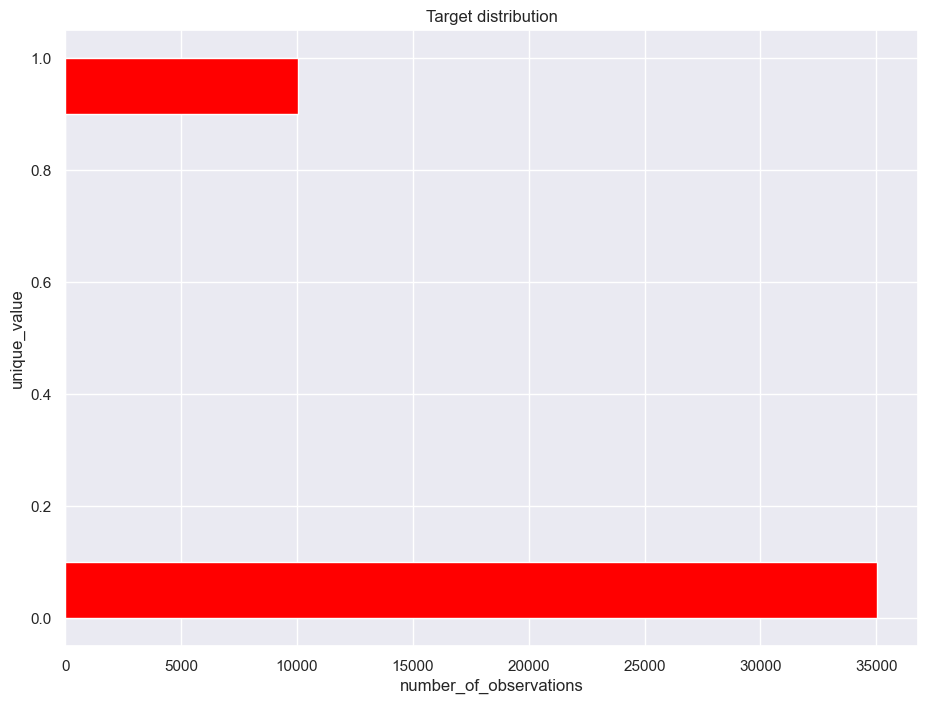

In [4]:
# Check the class balance.
ax = df["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of the target:")
df["SeriousDlqin2yrs"].value_counts() / df.shape[0]

## ML Data Engineering

In [5]:
# The independent column names.
independent_columns_names = [x for x in df if x != "SeriousDlqin2yrs"]

In [6]:
# Replace NaN values with the median for each column.
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [7]:
# Replace NaN values.
table = fill_nan(df)

In [8]:
# Separate the target variable and input features.
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

## ML Model Engineering

In [9]:
# Create a LogisticRegression model and use class_weight=’balanced’ to make up for our unbalanced classes.
lr = LogisticRegression(random_state=5, class_weight="balanced")

In [10]:
# The grid search parameters.
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [11]:
# Apply stratified 5-fold validation.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [12]:
# Look at the ROC AUC against different values of the grid search parameters.
grid_search = GridSearchCV(lr, parameters, n_jobs=-1, scoring="roc_auc", cv=skf)
grid_search = grid_search.fit(X, y)
grid_search.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

## ML Model Evaluation

In [13]:
# Display the standard deviations.
grid_search.cv_results_["std_test_score"]

array([0.00729216, 0.00813756, 0.00795254, 0.00516278, 0.00749946,
       0.00517494])

In [14]:
# The ROC AUC value of the best model
grid_search.best_score_

0.8089120626797153

In [15]:
# Feature importance is defined by the absolute value of its corresponding coefficient.
lr = LogisticRegression(C=0.001, random_state=5, class_weight="balanced")

# First normalize all the feature values so that it will be correct to compare them.
scal = StandardScaler()
lr.fit(scal.fit_transform(X), y)

# Display the feature importance.
pd.DataFrame(
    {"feat": independent_columns_names, "coef": lr.coef_.flatten().tolist()}
).sort_values(by="coef", ascending=False)

,feat,coef
1,NumberOfTime30-59DaysPastDueNotWorse,0.723427
3,NumberOfTimes90DaysLate,0.516788
4,NumberOfTime60-89DaysPastDueNotWorse,0.193558
6,NumberOfDependents,0.101443
2,DebtRatio,-0.024096
5,MonthlyIncome,-0.163146
0,age,-0.416702


NumberOfTime30-59DaysPastDueNotWorse is the most important feature for the best logistic regression model.

## References

https://chat.openai.com/<br>
https://github.com/Yorko/mlcourse.ai/blob/main/data/credit_scoring_sample.csv<br>
https://mlcourse.ai/book/topic05/assignment05_logit_rf_credit_scoring_solution.html